<a href="https://colab.research.google.com/github/denmj/kaggle/blob/master/WiDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:

import sys

# Working with data 
import pandas as pd

# Vizualization 
import matplotlib

# math and stat lib
import numpy as np
import scipy as sp

import IPython
from IPython import display
import sklearn 
import random
import time

import warnings
warnings.filterwarnings('ignore')

In [128]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier


#Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics


#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

import plotly.graph_objects as go 
import plotly.express as px 


#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [227]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500) 


In [130]:
data_dict = pd.read_csv('/content/DataDictionaryWiDS2021.csv')

train_set = pd.read_csv('/content/TrainingWiDS2021.csv')
test_set = pd.read_csv('/content/UnlabeledWiDS2021.csv')

In [131]:
train_set.info(), test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130157 entries, 0 to 130156
Columns: 181 entries, Unnamed: 0 to diabetes_mellitus
dtypes: float64(157), int64(18), object(6)
memory usage: 179.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10234 entries, 0 to 10233
Columns: 180 entries, Unnamed: 0 to solid_tumor_with_metastasis
dtypes: float64(156), int64(18), object(6)
memory usage: 14.1+ MB


(None, None)

In [132]:
train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,130157.0,65079.000000,37573.233831,1.000000,32540.000000,65079.000000,97618.000000,130157.000000
encounter_id,130157.0,213000.856519,38109.828146,147000.000000,180001.000000,213014.000000,246002.000000,279000.000000
hospital_id,130157.0,106.102131,63.482277,1.000000,49.000000,112.000000,165.000000,204.000000
age,125169.0,61.995103,16.822880,0.000000,52.000000,64.000000,75.000000,89.000000
bmi,125667.0,29.110260,8.262776,14.844926,23.598006,27.564749,32.803127,67.814990
elective_surgery,130157.0,0.189840,0.392176,0.000000,0.000000,0.000000,0.000000,1.000000
height,128080.0,169.607219,10.833085,137.200000,162.500000,170.100000,177.800000,195.590000
icu_id,130157.0,662.428344,304.259843,82.000000,427.000000,653.000000,969.000000,1111.000000
pre_icu_los_days,130157.0,0.839933,2.485337,-0.250000,0.045833,0.155556,0.423611,175.627778
readmission_status,130157.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [133]:
train_set.shape, test_set.shape

# copy of orig data set 
train_set_copy = train_set.copy()
test_set_copy = test_set.copy()

In [134]:
# Cols  that are useless (idex and id cols) 
train_set_copy = train_set_copy.drop(columns=['Unnamed: 0', 'encounter_id','hospital_id','icu_id'])
test_set_copy = test_set_copy.drop(columns=['Unnamed: 0', 'encounter_id','hospital_id','icu_id'])

In [135]:
both_sets = [train_set_copy, test_set_copy]

In [136]:
cols = train_set_copy.columns
list(cols)

# 177 features (prob too many)
len(list(cols)) 

177

In [137]:
# Analysis of missing vals in data set
# quick vizual on missing / na values in data set 
def miss_table(df):

    MVT_cols = ['Feature','Not missing vals','Total missing vals', '% of missing vals']
    Missing_value_table = pd.DataFrame(columns = MVT_cols)
    Missing_value_table

    total_= df.count()
    missing_vals_ = df.isna().sum()
    total_entries = df.count().max()
    cols = df.columns

    _index = 0
    for missing, total, col_name in zip(missing_vals_, total_, cols):
        Missing_value_table.loc[_index, 'Feature'] = col_name
        Missing_value_table.loc[_index, 'Not missing vals'] = total
        Missing_value_table.loc[_index, 'Total missing vals'] = missing
        Missing_value_table.loc[_index, '% of missing vals'] = (missing/total_entries)*100
        _index += 1
    return Missing_value_table  


In [138]:
missing_val_train_set = miss_table(train_set_copy)
missing_val_train_set.sort_values(by='% of missing vals', ascending=False)

,Feature,Not missing vals,Total missing vals,% of missing vals
125,h1_bilirubin_max,10296,119861,92.0896
126,h1_bilirubin_min,10296,119861,92.0896
123,h1_albumin_max,11152,119005,91.4319
124,h1_albumin_min,11152,119005,91.4319
143,h1_lactate_max,11690,118467,91.0185
144,h1_lactate_min,11690,118467,91.0185
167,h1_pao2fio2ratio_max,16760,113397,87.1232
168,h1_pao2fio2ratio_min,16760,113397,87.1232
164,h1_arterial_ph_min,22308,107849,82.8607
163,h1_arterial_ph_max,22308,107849,82.8607


In [139]:
missing_val_test_set = miss_table(test_set_copy)
missing_val_test_set.sort_values(by='% of missing vals', ascending=False)

,Feature,Not missing vals,Total missing vals,% of missing vals
143,h1_lactate_max,813,9421,92.0559
144,h1_lactate_min,813,9421,92.0559
126,h1_bilirubin_min,827,9407,91.9191
125,h1_bilirubin_max,827,9407,91.9191
124,h1_albumin_min,869,9365,91.5087
123,h1_albumin_max,869,9365,91.5087
167,h1_pao2fio2ratio_max,1422,8812,86.1051
168,h1_pao2fio2ratio_min,1422,8812,86.1051
163,h1_arterial_ph_max,1833,8401,82.0891
164,h1_arterial_ph_min,1833,8401,82.0891


In [140]:
# Rule of thumb, anything with at least 50% and more missing data, candidate cols to be dropped

cols_to_drop_train  =  list(missing_val_train_set['Feature'][missing_val_train_set['% of missing vals'] > 50])
cols_to_drop_test = list(missing_val_test_set['Feature'][missing_val_test_set['% of missing vals'] > 50])

In [141]:
# 73 cols to drop 
len(cols_to_drop_train), len(cols_to_drop_test)
# check if both sets cols match  

both_cols = [col for col in cols_to_drop_train if col in cols_to_drop_test]
len(both_cols)

73

In [142]:
# test set has 1 more col where missing data more than 50% 
extra_col  = [col for col in cols_to_drop_test if col not in cols_to_drop_train]
extra_col   

['urineoutput_apache']

In [143]:
# we could use 'cols_to_drop_test' from test set (74) to drop from both sets

In [144]:
# 103 to check if we can impute some data 
len(list(cols))  - len(cols_to_drop_test) 

103

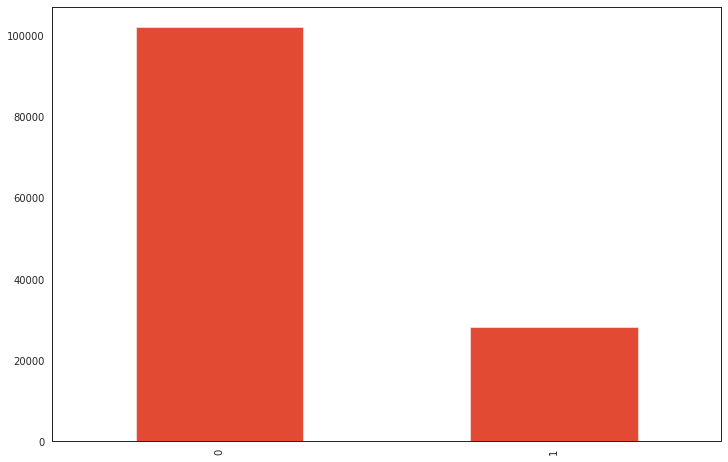

In [145]:
# 1:5 ratio. 1 - represents patients with diabetes_mellitus and 0 - without diabetes_mellitus 
train_set_copy['diabetes_mellitus'].value_counts().plot.bar()

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

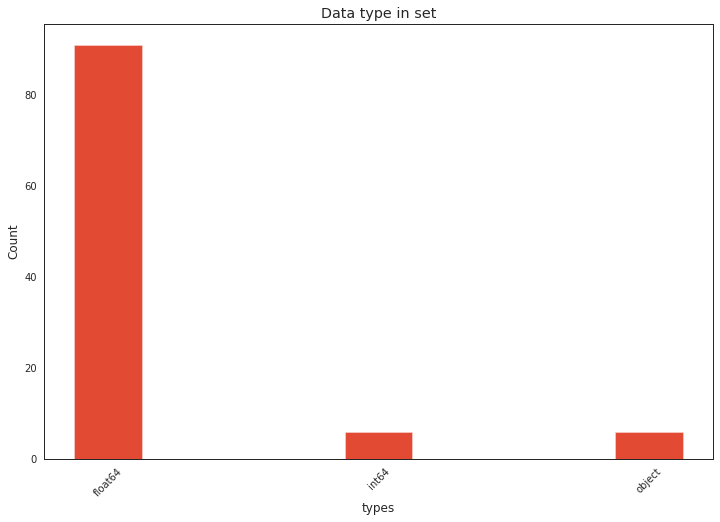

In [146]:
# Lest check class balance 
width = 0.25
plt.bar(type_table['column type'], type_table['counts'], width);
# Add labels and title
plt.title("Data type in set")
plt.xlabel("types")
plt.ylabel("Count")
plt.xticks(rotation=45)  


In [147]:
# 1st way (Lazy way), we will fill missing cells with 0 for int/float data type, but also drop cols with  50% > misses 
# Dropping from train and test sets 
for data_set in both_sets:
    data_set.drop(cols_to_drop_test, axis = 1, inplace=True)

In [148]:
len(list(train_set_copy.columns)), len(list(test_set_copy.columns))

(103, 102)

In [149]:
type_table = pd.DataFrame(columns = ['Feature', 'column type'])
inx = 0
for col_name in train_set_copy.columns:
    type_table.loc[inx, 'Feature'] = col_name
    type_table.loc[inx, 'column type'] = str(train_set_copy[col_name].dtype)
    inx += 1

In [150]:
type_table['counts'] = type_table.groupby(['column type'])['column type'].transform('count')

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

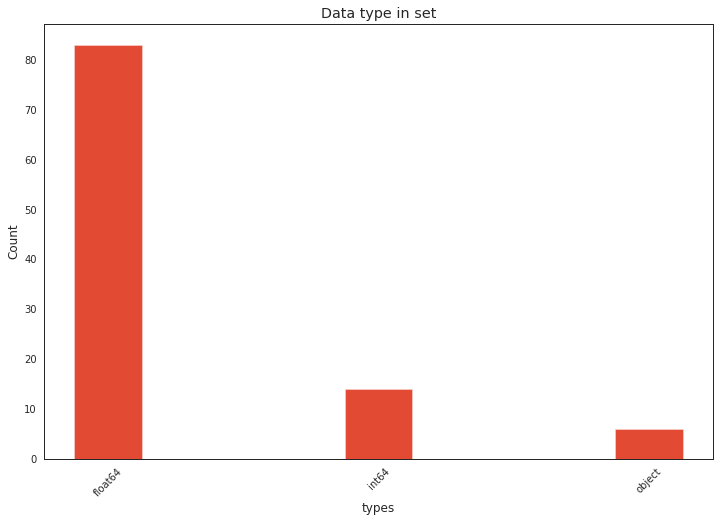

In [151]:
width = 0.25
plt.bar(type_table['column type'], type_table['counts'], width);
# Add labels and title
plt.title("Data type in set")
plt.xlabel("types")
plt.ylabel("Count")
plt.xticks(rotation=45)  


In [152]:
# Mostly numerical type (int, float) and less than 10 cats 

In [153]:
train_set_copy.columns[train_set_copy.dtypes == 'object'] 

Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type'],
      dtype='object')

In [154]:
# lets get differernt type (cat, int, float) cols, for analysis and data viz
cat_cols = list(train_set_copy.columns[train_set_copy.dtypes == 'object'])

numerical_cols = list(train_set_copy.columns[(train_set_copy.dtypes == 'float64') |  (train_set_copy.dtypes == 'int64')])


In [155]:
cat_cols , numerical_cols

(['ethnicity',
  'gender',
  'hospital_admit_source',
  'icu_admit_source',
  'icu_stay_type',
  'icu_type'],
 ['age',
  'bmi',
  'elective_surgery',
  'height',
  'pre_icu_los_days',
  'readmission_status',
  'weight',
  'apache_2_diagnosis',
  'apache_3j_diagnosis',
  'apache_post_operative',
  'arf_apache',
  'bun_apache',
  'creatinine_apache',
  'gcs_eyes_apache',
  'gcs_motor_apache',
  'gcs_unable_apache',
  'gcs_verbal_apache',
  'glucose_apache',
  'heart_rate_apache',
  'hematocrit_apache',
  'intubated_apache',
  'map_apache',
  'resprate_apache',
  'sodium_apache',
  'temp_apache',
  'ventilated_apache',
  'wbc_apache',
  'd1_diasbp_max',
  'd1_diasbp_min',
  'd1_diasbp_noninvasive_max',
  'd1_diasbp_noninvasive_min',
  'd1_heartrate_max',
  'd1_heartrate_min',
  'd1_mbp_max',
  'd1_mbp_min',
  'd1_mbp_noninvasive_max',
  'd1_mbp_noninvasive_min',
  'd1_resprate_max',
  'd1_resprate_min',
  'd1_spo2_max',
  'd1_spo2_min',
  'd1_sysbp_max',
  'd1_sysbp_min',
  'd1_sysbp_noni

In [156]:
# Lets check gender or ethnicity features
cat_cols

['ethnicity',
 'gender',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type']

In [157]:
gender_df = train_set_copy[['gender']]
gender_df['count'] = gender_df.groupby(['gender'])['gender'].transform('count')
gender_df = gender_df.dropna()

In [158]:
# 66 vals missing, dropping in order to plot it
gender_df['gender'].isna().sum()

0

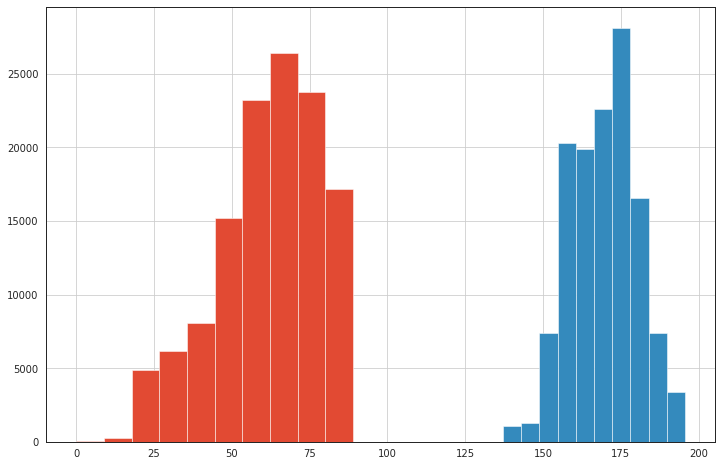

In [159]:
train_set_copy['age' ].hist()
train_set_copy['height'].hist()


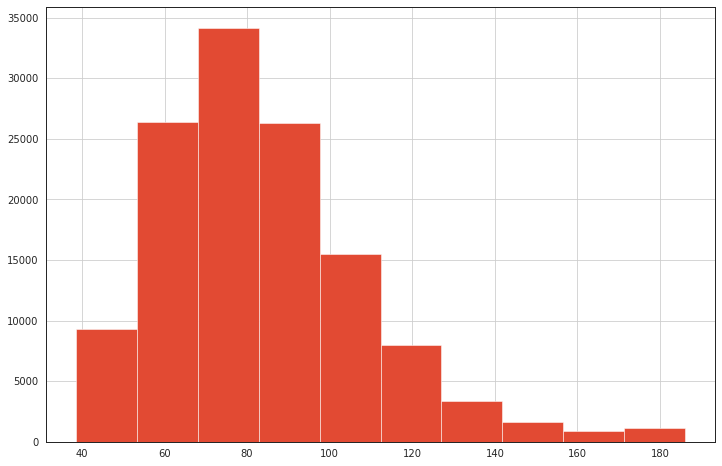

In [160]:
train_set_copy['weight'].hist()

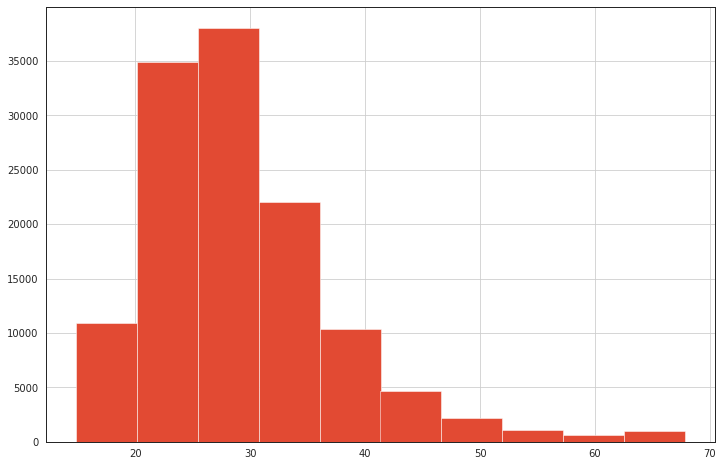

In [161]:
train_set_copy['bmi'].hist()

In [162]:
t =  miss_table(train_set_copy)

In [163]:
t.sort_values(by='% of missing vals', ascending=False)

,Feature,Not missing vals,Total missing vals,% of missing vals
6,hospital_admit_source,96959,33198,25.5061
72,h1_temp_min,100454,29703,22.8209
71,h1_temp_max,100454,29703,22.8209
32,wbc_apache,100682,29475,22.6457
25,hematocrit_apache,103399,26758,20.5582
17,bun_apache,104746,25411,19.5233
18,creatinine_apache,105275,24882,19.1169
29,sodium_apache,105638,24519,18.838
82,d1_hco3_min,110110,20047,15.4022
81,d1_hco3_max,110110,20047,15.4022


In [164]:
# Now lazy method (just to check fast were we would be), we just fill with blanks for cat vars

In [165]:
train_set_copy['age'].isna().sum()

4988

In [166]:
cat_cols , numerical_cols

(['ethnicity',
  'gender',
  'hospital_admit_source',
  'icu_admit_source',
  'icu_stay_type',
  'icu_type'],
 ['age',
  'bmi',
  'elective_surgery',
  'height',
  'pre_icu_los_days',
  'readmission_status',
  'weight',
  'apache_2_diagnosis',
  'apache_3j_diagnosis',
  'apache_post_operative',
  'arf_apache',
  'bun_apache',
  'creatinine_apache',
  'gcs_eyes_apache',
  'gcs_motor_apache',
  'gcs_unable_apache',
  'gcs_verbal_apache',
  'glucose_apache',
  'heart_rate_apache',
  'hematocrit_apache',
  'intubated_apache',
  'map_apache',
  'resprate_apache',
  'sodium_apache',
  'temp_apache',
  'ventilated_apache',
  'wbc_apache',
  'd1_diasbp_max',
  'd1_diasbp_min',
  'd1_diasbp_noninvasive_max',
  'd1_diasbp_noninvasive_min',
  'd1_heartrate_max',
  'd1_heartrate_min',
  'd1_mbp_max',
  'd1_mbp_min',
  'd1_mbp_noninvasive_max',
  'd1_mbp_noninvasive_min',
  'd1_resprate_max',
  'd1_resprate_min',
  'd1_spo2_max',
  'd1_spo2_min',
  'd1_sysbp_max',
  'd1_sysbp_min',
  'd1_sysbp_noni

In [167]:
# Remove target label 
numerical_cols.remove('diabetes_mellitus') 

In [168]:
# Fill with blank and treat them as another category 
train_set_copy[cat_cols] = train_set_copy[cat_cols].fillna("")
test_set_copy[cat_cols] = test_set_copy[cat_cols].fillna("")

In [169]:
# train_set_copy[numerical_cols] = train_set_copy[numerical_cols].fillna(value=0)
# test_set_copy[numerical_cols] = test_set_copy[numerical_cols].fillna(value=0)

In [170]:
train_set_copy.isna().sum(), test_set_copy.isna().sum()

(age                             4988
 bmi                             4490
 elective_surgery                   0
 ethnicity                          0
 gender                             0
 height                          2077
 hospital_admit_source              0
 icu_admit_source                   0
 icu_stay_type                      0
 icu_type                           0
 pre_icu_los_days                   0
 readmission_status                 0
 weight                          3463
 apache_2_diagnosis              1685
 apache_3j_diagnosis              865
 apache_post_operative              0
 arf_apache                         0
 bun_apache                     25411
 creatinine_apache              24882
 gcs_eyes_apache                 2190
 gcs_motor_apache                2190
 gcs_unable_apache                709
 gcs_verbal_apache               2190
 glucose_apache                 14696
 heart_rate_apache                309
 hematocrit_apache              26758
 intubated_a

In [171]:
train_set_copy.head(3)

,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,...,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,admit,CTICU,0.541667,0,73.9,113.0,502.01,0,0,31.0,2.51,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,36.0,134.0,39.3,0,14.1,68.0,37.0,68.0,37.0,119.0,72.0,89.0,...,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,39.5,37.5,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0,0,0,0,0,0,0,1
1,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,admit,Med-Surg ICU,0.927778,0,70.2,108.0,203.01,0,0,9.0,0.56,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,33.0,145.0,35.1,1,12.7,95.0,31.0,95.0,31.0,118.0,72.0,120.0,...,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,36.3,36.3,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0,0,0,0,0,0,0,1
2,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,0.000694,0,95.3,122.0,703.03,0,0,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0,68.0,37.0,NaN,36.7,0,NaN,88.0,48.0,88.0,48.0,96.0,68.0,102.0,...,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,36.7,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0


In [172]:
# Encode features

df_tr = train_set_copy.copy()
df_tr.isna().sum()
df_te = test_set_copy.copy()



In [173]:
# Keep target label
train_Y = df_tr['diabetes_mellitus']
train_Y.shape

(130157,)

In [174]:
df_tr.drop(['diabetes_mellitus'], axis=1, inplace=True)

In [175]:
df_tr.shape, df_te.shape, cat_cols

((130157, 102),
 (10234, 102),
 ['ethnicity',
  'gender',
  'hospital_admit_source',
  'icu_admit_source',
  'icu_stay_type',
  'icu_type'])

In [176]:
both_df = pd.concat([df_tr, df_te])

In [177]:
both_df.shape

(140391, 102)

In [178]:
both_df = pd.get_dummies(both_df, prefix=cat_cols)


In [179]:
both_df.head(2)

,age,bmi,elective_surgery,height,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,...,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_,gender_F,gender_M,hospital_admit_source_,hospital_admit_source_Acute Care/Floor,hospital_admit_source_Chest Pain Center,hospital_admit_source_Direct Admit,hospital_admit_source_Emergency Department,hospital_admit_source_Floor,hospital_admit_source_ICU,hospital_admit_source_ICU to SDU,hospital_admit_source_Observation,hospital_admit_source_Operating Room,hospital_admit_source_Other,hospital_admit_source_Other Hospital,hospital_admit_source_Other ICU,hospital_admit_source_PACU,hospital_admit_source_Recovery Room,hospital_admit_source_Step-Down Unit (SDU),icu_admit_source_,icu_admit_source_Accident & Emergency,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,icu_stay_type_admit,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CCU-CTICU,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU
0,68.0,22.732803,0,180.3,0.541667,0,73.9,113.0,502.01,0,0,31.0,2.51,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,36.0,134.0,39.3,0,14.1,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,...,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,77.0,27.421875,0,160.0,0.927778,0,70.2,108.0,203.01,0,0,9.0,0.56,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,33.0,145.0,35.1,1,12.7,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,...,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [180]:
df_tr = both_df.iloc[:130157,:] 
df_te = both_df.iloc[130158:,:] 

In [181]:
df_tr.shape, df_te.shape

((130157, 139), (10233, 139))

In [182]:
# Fill NaNs 

In [183]:
# Age -> median fills NA and Zeros 
df_tr['age'].fillna(value=df_tr['age'].median(), inplace=True)
df_te['age'].fillna(value=df_te['age'].median(), inplace=True)
df_tr['age'].replace(0, df_tr['age'].median(), inplace=True)
df_te['age'].replace(0, df_te['age'].median(), inplace=True)
df_tr['age'] = pd.cut(df_tr['age'], 5, labels=[1,2,3,4,5])
df_te['age'] = pd.cut(df_te['age'], 5, labels=[1,2,3,4,5])

# Bmi - mean 
df_tr['bmi'].fillna(value=df_tr['bmi'].mean(), inplace=True)
df_te['bmi'].fillna(value=df_te['bmi'].mean(), inplace=True)
df_tr['bmi'] = pd.qcut(df_tr['bmi'], 5, labels=[1,2,3,4,5])
df_te['bmi'] = pd.qcut(df_te['bmi'], 5, labels=[1,2,3,4,5])


# height - mean 
df_tr['height'].fillna(value=df_tr['height'].mean(), inplace=True)
df_te['height'].fillna(value=df_te['height'].mean(), inplace=True)

df_tr['height'] = pd.qcut(df_tr['height'], 5, labels=[1,2,3,4,5])
df_te['height'] = pd.qcut(df_te['height'], 5, labels=[1,2,3,4,5])


# weight - mean 
df_tr['weight'].fillna(value=df_tr['weight'].mean(), inplace=True)
df_te['weight'].fillna(value=df_te['weight'].mean(), inplace=True)

df_tr['weight'] = pd.qcut(df_tr['weight'], 5, labels=[1,2,3,4,5])
df_te['weight'] = pd.qcut(df_te['weight'], 5, labels=[1,2,3,4,5])


In [184]:
# outliers looks ok 
df_te['pre_icu_los_days'] = pd.qcut(df_te['pre_icu_los_days'], 35, labels=[x+1 for x in range(35)])
df_tr['pre_icu_los_days'] = pd.qcut(df_tr['pre_icu_los_days'], 35, labels=[x+1 for x in range(35)])

In [185]:
# bun_apache - median 
df_tr['bun_apache'].fillna(value=df_tr['bun_apache'].median(), inplace=True)
df_te['bun_apache'].fillna(value=df_te['bun_apache'].median(), inplace=True)

In [186]:
df_tr['bun_apache'] = pd.qcut(df_tr['bun_apache'], 4, labels=[1,2,3,4])
df_te['bun_apache'] = pd.qcut(df_te['bun_apache'], 4, labels=[1,2,3,4])

In [187]:
# creatinine_apache - median 
df_tr['creatinine_apache'].fillna(value=df_tr['creatinine_apache'].median(), inplace=True)
df_te['creatinine_apache'].fillna(value=df_te['creatinine_apache'].median(), inplace=True)

In [188]:
df_tr['creatinine_apache'] = pd.qcut(df_tr['creatinine_apache'], 4, labels=[1,2,3,4])
df_te['creatinine_apache'] = pd.qcut(df_te['creatinine_apache'], 4, labels=[1,2,3,4])

In [189]:
# apache_2_diagnosis - median  -> 
df_tr['apache_2_diagnosis'].fillna(value=df_tr['apache_2_diagnosis'].median(), inplace=True)
df_te['apache_2_diagnosis'].fillna(value=df_te['apache_2_diagnosis'].median(), inplace=True)

In [190]:
# this feature clustered into 3 subgroups
df_tr['apache_2_diagnosis'] = pd.qcut(df_tr['apache_2_diagnosis'], q=[0, 0.55,  0.6, 0.7, 1], labels=[1,2,3,4])
df_te['apache_2_diagnosis'] = pd.qcut(df_te['apache_2_diagnosis'], q=[0, 0.55,  0.6, 0.7, 1], labels=[1,2,3,4])

In [191]:
# apache_3j_diagnosis - median  -> 
df_tr['apache_3j_diagnosis'].fillna(value=df_tr['apache_3j_diagnosis'].mean(), inplace=True)
df_te['apache_3j_diagnosis'].fillna(value=df_te['apache_3j_diagnosis'].mean(), inplace=True)

In [192]:
df_tr['apache_3j_diagnosis'] = pd.qcut(df_tr['apache_3j_diagnosis'], q=[0, 0.2,  0.4, 0.6, 0.8,  1], labels=[1,2,3,4,5])
df_te['apache_3j_diagnosis'] = pd.qcut(df_te['apache_3j_diagnosis'], q=[0, 0.2,  0.4, 0.6, 0.8,  1], labels=[1,2,3,4,5])

In [193]:
# gcs_eyes_apache  -> mode fill
df_tr['gcs_eyes_apache'].fillna(value=df_tr['gcs_eyes_apache'].mode()[0], inplace=True)
df_te['gcs_eyes_apache'].fillna(value=df_te['gcs_eyes_apache'].mode()[0], inplace=True)

In [194]:
# gcs_motor_apache  -> mode fill
df_tr['gcs_motor_apache'].fillna(value=df_tr['gcs_motor_apache'].mode()[0], inplace=True)
df_te['gcs_motor_apache'].fillna(value=df_te['gcs_motor_apache'].mode()[0], inplace=True)

In [195]:
# gcs_unable_apache -> mode fill
df_tr['gcs_unable_apache'].fillna(value=df_tr['gcs_unable_apache'].mode()[0], inplace=True)
df_te['gcs_unable_apache'].fillna(value=df_te['gcs_unable_apache'].mode()[0], inplace=True)

In [196]:
# gcs_verbal_apache -> mode fill
df_tr['gcs_verbal_apache'].fillna(value=df_tr['gcs_verbal_apache'].mode()[0], inplace=True)
df_te['gcs_verbal_apache'].fillna(value=df_te['gcs_verbal_apache'].mode()[0], inplace=True)

In [197]:
# glucose_apache
df_tr['glucose_apache'].fillna(method='ffill', inplace=True)
df_te['glucose_apache'].fillna(method='ffill', inplace=True)

In [198]:
# dropping temp feature 
df_tr.drop(['h1_temp_max', 'h1_temp_min'], axis=1, inplace=True)
df_te.drop(['h1_temp_max', 'h1_temp_min'], axis=1, inplace=True)

In [199]:
df_tr.drop(['wbc_apache', 'hematocrit_apache'], axis=1, inplace=True)
df_te.drop(['wbc_apache', 'hematocrit_apache'], axis=1, inplace=True)

In [200]:
# sodium_apache
df_tr['sodium_apache'].fillna(method='ffill', inplace=True)
df_te['sodium_apache'].fillna(method='ffill', inplace=True)

In [201]:
df_tr['d1_hco3_max'].fillna(method='ffill', inplace=True)
df_te['d1_hco3_max'].fillna(method='ffill', inplace=True)

df_tr['d1_hco3_min'].fillna(method='ffill', inplace=True)
df_te['d1_hco3_min'].fillna(method='ffill', inplace=True)

In [202]:
df_tr['d1_platelets_min'].fillna(method='ffill', inplace=True)
df_te['d1_platelets_min'].fillna(method='ffill', inplace=True)

df_tr['d1_platelets_max'].fillna(method='ffill', inplace=True)
df_te['d1_platelets_max'].fillna(method='ffill', inplace=True)

In [203]:
df_tr['d1_wbc_min'].fillna(method='ffill', inplace=True)
df_te['d1_wbc_min'].fillna(method='ffill', inplace=True)

df_tr['d1_wbc_max'].fillna(method='ffill', inplace=True)
df_te['d1_wbc_max'].fillna(method='ffill', inplace=True)

In [204]:
df_tr['d1_calcium_max'].fillna(method='ffill', inplace=True)
df_te['d1_calcium_max'].fillna(method='ffill', inplace=True)

df_tr['d1_calcium_min'].fillna(method='ffill', inplace=True)
df_te['d1_calcium_min'].fillna(method='ffill', inplace=True)



In [205]:
# This d1_hemaglobin_min/max looks already altered and values imputed by ffill

df_tr['d1_hemaglobin_min'].fillna(method='ffill', inplace=True)
df_te['d1_hemaglobin_min'].fillna(method='ffill', inplace=True)

df_tr['d1_hemaglobin_max'].fillna(method='ffill', inplace=True)
df_te['d1_hemaglobin_max'].fillna(method='ffill', inplace=True)


In [206]:
# This d1_hematocrit_min/max looks already altered and values imputed by ffill

df_tr['d1_hematocrit_min'].fillna(method='ffill', inplace=True)
df_te['d1_hematocrit_min'].fillna(method='ffill', inplace=True)

df_tr['d1_hematocrit_max'].fillna(method='ffill', inplace=True)
df_te['d1_hematocrit_max'].fillna(method='ffill', inplace=True)


In [207]:
# This d1_bun_min/max looks already altered and values imputed by ffill

df_tr['d1_bun_min'].fillna(method='ffill', inplace=True)
df_te['d1_bun_min'].fillna(method='ffill', inplace=True)

df_tr['d1_bun_max'].fillna(method='ffill', inplace=True)
df_te['d1_bun_max'].fillna(method='ffill', inplace=True)

# This heart_rate_apache looks already altered and values imputed by ffill and bimodal distributed

df_tr['heart_rate_apache'].fillna(method='ffill', inplace=True)
df_te['heart_rate_apache'].fillna(method='ffill', inplace=True)

df_tr['map_apache'].fillna(method='ffill', inplace=True)
df_te['map_apache'].fillna(method='ffill', inplace=True)

df_tr['resprate_apache'].fillna(method='ffill', inplace=True)
df_te['resprate_apache'].fillna(method='ffill', inplace=True)

df_tr['h1_mbp_noninvasive_max'].fillna(method='ffill', inplace=True)
df_te['h1_mbp_noninvasive_max'].fillna(method='ffill', inplace=True)

df_tr['h1_mbp_noninvasive_min'].fillna(method='ffill', inplace=True)
df_te['h1_mbp_noninvasive_min'].fillna(method='ffill', inplace=True)

df_tr['d1_creatinine_max'].fillna(method='ffill', inplace=True)
df_te['d1_creatinine_max'].fillna(method='ffill', inplace=True)

df_tr['d1_creatinine_min'].fillna(method='ffill', inplace=True)
df_te['d1_creatinine_min'].fillna(method='ffill', inplace=True)

df_tr['d1_sodium_min'].fillna(method='ffill', inplace=True)
df_te['d1_sodium_min'].fillna(method='ffill', inplace=True)

df_tr['d1_sodium_max'].fillna(method='ffill', inplace=True)
df_te['d1_sodium_max'].fillna(method='ffill', inplace=True)

df_tr['d1_potassium_max'].fillna(method='ffill', inplace=True)
df_te['d1_potassium_max'].fillna(method='ffill', inplace=True)

df_tr['d1_potassium_min'].fillna(method='ffill', inplace=True)
df_te['d1_potassium_min'].fillna(method='ffill', inplace=True)

df_tr['h1_diasbp_noninvasive_max'].fillna(method='ffill', inplace=True)
df_te['h1_diasbp_noninvasive_max'].fillna(method='ffill', inplace=True)

df_tr['h1_diasbp_noninvasive_min'].fillna(method='ffill', inplace=True)
df_te['h1_diasbp_noninvasive_min'].fillna(method='ffill', inplace=True)

df_tr['h1_sysbp_noninvasive_max'].fillna(method='ffill', inplace=True)
df_te['h1_sysbp_noninvasive_max'].fillna(method='ffill', inplace=True)

df_tr['h1_sysbp_noninvasive_min'].fillna(method='ffill', inplace=True)
df_te['h1_sysbp_noninvasive_min'].fillna(method='ffill', inplace=True)

df_tr['d1_glucose_max'].fillna(method='ffill', inplace=True)
df_te['d1_glucose_max'].fillna(method='ffill', inplace=True)

df_tr['d1_glucose_min'].fillna(method='ffill', inplace=True)
df_te['d1_glucose_min'].fillna(method='ffill', inplace=True)

df_tr['temp_apache'].fillna(method='ffill', inplace=True)
df_te['temp_apache'].fillna(method='ffill', inplace=True)

df_tr['h1_mbp_max'].fillna(method='ffill', inplace=True)
df_te['h1_mbp_max'].fillna(method='ffill', inplace=True)

df_tr['h1_mbp_min'].fillna(method='ffill', inplace=True)
df_te['h1_mbp_min'].fillna(method='ffill', inplace=True)

df_tr['h1_resprate_min'].fillna(method='ffill', inplace=True)
df_te['h1_resprate_min'].fillna(method='ffill', inplace=True)

df_tr['h1_resprate_max'].fillna(method='ffill', inplace=True)
df_te['h1_resprate_max'].fillna(method='ffill', inplace=True)

df_tr['h1_spo2_max'].fillna(value=df_tr['h1_spo2_max'].max(), inplace=True)
df_te['h1_spo2_max'].fillna(value=df_tr['h1_spo2_max'].max(), inplace=True)

df_tr['h1_spo2_min'].fillna(value=df_tr['h1_spo2_min'].max(), inplace=True)
df_te['h1_spo2_min'].fillna(value=df_tr['h1_spo2_min'].max(), inplace=True)

df_tr['h1_diasbp_min'].fillna(method='ffill', inplace=True)
df_te['h1_diasbp_min'].fillna(method='ffill', inplace=True)

df_tr['h1_diasbp_max'].fillna(method='ffill', inplace=True)
df_te['h1_diasbp_max'].fillna(method='ffill', inplace=True)

df_tr['h1_sysbp_max'].fillna(method='ffill', inplace=True)
df_te['h1_sysbp_max'].fillna(method='ffill', inplace=True)

df_tr['h1_sysbp_min'].fillna(method='ffill', inplace=True)
df_te['h1_sysbp_min'].fillna(method='ffill', inplace=True)

df_tr['d1_temp_min'].fillna(method='ffill', inplace=True)
df_te['d1_temp_min'].fillna(method='ffill', inplace=True)

df_tr['d1_temp_max'].fillna(method='ffill', inplace=True)
df_te['d1_temp_max'].fillna(method='ffill', inplace=True)

df_tr['h1_heartrate_max'].fillna(method='ffill', inplace=True)
df_te['h1_heartrate_max'].fillna(method='ffill', inplace=True)

df_tr['h1_heartrate_min'].fillna(method='ffill', inplace=True)
df_te['h1_heartrate_min'].fillna(method='ffill', inplace=True)

df_tr['d1_mbp_noninvasive_max'].fillna(method='ffill', inplace=True)
df_te['d1_mbp_noninvasive_max'].fillna(method='ffill', inplace=True)

df_tr['d1_mbp_noninvasive_min'].fillna(method='ffill', inplace=True)
df_te['d1_mbp_noninvasive_min'].fillna(method='ffill', inplace=True)


In [208]:
tr_cols = list(df_tr.columns[df_tr.isna().sum() > 0])

for col in tr_cols: 
    df_tr[col].fillna(method='ffill', inplace=True)
    df_te[col].fillna(method='ffill', inplace=True)

In [209]:
te_cols = list(df_te.columns[df_te.isna().sum() > 0])

for col in te_cols: 
    df_te[col].fillna(method='bfill', inplace=True)

In [276]:
# df_tr['glucose_apache'] = pd.qcut(df_tr['glucose_apache'], 5, labels=[1,2,3,4,5])
# df_te['glucose_apache'] = pd.qcut(df_te['glucose_apache'], 5, labels=[1,2,3,4,5])


# df_tr['heart_rate_apache'] = pd.qcut(df_tr['heart_rate_apache'], 5, labels=[1,2,3,4,5])
# df_te['heart_rate_apache'] = pd.qcut(df_te['heart_rate_apache'], 5, labels=[1,2,3,4,5])

# df_tr['map_apache'] = pd.qcut(df_tr['map_apache'], 5, labels=[1,2,3,4,5])
# df_te['map_apache'] = pd.qcut(df_te['map_apache'], 5, labels=[1,2,3,4,5])

# df_tr['resprate_apache'] = pd.qcut(df_tr['resprate_apache'], 5, labels=[1,2,3,4,5])
# df_te['resprate_apache'] = pd.qcut(df_te['resprate_apache'], 5, labels=[1,2,3,4,5])

# df_tr['sodium_apache'] = pd.qcut(df_tr['sodium_apache'], 5, labels=[1,2,3,4,5])
# df_te['sodium_apache'] = pd.qcut(df_te['sodium_apache'], 5, labels=[1,2,3,4,5])

# df_tr['d1_diasbp_max'] = pd.qcut(df_tr['d1_diasbp_max'], 5, labels=[1,2,3,4,5])
# df_te['d1_diasbp_max'] = pd.qcut(df_te['d1_diasbp_max'], 5, labels=[1,2,3,4,5])

# df_tr['d1_diasbp_min'] = pd.qcut(df_tr['d1_diasbp_min'], 5, labels=[1,2,3,4,5])
# df_te['d1_diasbp_min'] = pd.qcut(df_te['d1_diasbp_min'], 5, labels=[1,2,3,4,5])

# df_tr['temp_apache'] = pd.qcut(df_tr['temp_apache'], 5, labels=[1,2,3,4,5])
# df_te['temp_apache'] = pd.qcut(df_te['temp_apache'], 5, labels=[1,2,3,4,5])

# df_tr['d1_diasbp_noninvasive_max'] = pd.qcut(df_tr['d1_diasbp_noninvasive_max'], 5, labels=[1,2,3,4,5])
# df_te['d1_diasbp_noninvasive_max'] = pd.qcut(df_te['d1_diasbp_noninvasive_max'], 5, labels=[1,2,3,4,5])

# df_tr['d1_diasbp_noninvasive_min'] = pd.qcut(df_tr['d1_diasbp_noninvasive_min'], 5, labels=[1,2,3,4,5])
# df_te['d1_diasbp_noninvasive_min'] = pd.qcut(df_te['d1_diasbp_noninvasive_min'], 5, labels=[1,2,3,4,5])

# df_tr['d1_heartrate_max'] = pd.qcut(df_tr['d1_heartrate_max'], 5, labels=[1,2,3,4,5])
# df_te['d1_heartrate_max'] = pd.qcut(df_te['d1_heartrate_max'], 5, labels=[1,2,3,4,5])

# df_tr['d1_heartrate_min'] = pd.qcut(df_tr['d1_heartrate_min'], 5, labels=[1,2,3,4,5])
# df_te['d1_heartrate_min'] = pd.qcut(df_te['d1_heartrate_min'], 5, labels=[1,2,3,4,5])


# df_tr['d1_mbp_max'] = pd.qcut(df_tr['d1_mbp_max'], 5, labels=[1,2,3,4,5])
# df_te['d1_mbp_max'] = pd.qcut(df_te['d1_mbp_max'], 5, labels=[1,2,3,4,5])

# df_tr['d1_mbp_min'] = pd.qcut(df_tr['d1_mbp_min'], 5, labels=[1,2,3,4,5])
# df_te['d1_mbp_min'] = pd.qcut(df_te['d1_mbp_min'], 5, labels=[1,2,3,4,5])


# df_tr['d1_mbp_noninvasive_max'] = pd.qcut(df_tr['d1_mbp_noninvasive_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_mbp_noninvasive_max'] = pd.qcut(df_te['d1_mbp_noninvasive_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['d1_mbp_noninvasive_min'] = pd.qcut(df_tr['d1_mbp_noninvasive_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_mbp_noninvasive_min'] = pd.qcut(df_te['d1_mbp_noninvasive_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['d1_resprate_max'] = pd.qcut(df_tr['d1_resprate_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_resprate_max'] = pd.qcut(df_te['d1_resprate_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['d1_resprate_min'] = pd.qcut(df_tr['d1_resprate_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_resprate_min'] = pd.qcut(df_te['d1_resprate_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['d1_spo2_max'] = pd.cut(df_tr['d1_spo2_max'], 5, labels=[1,2,3,4,5])
# df_te['d1_spo2_max'] = pd.cut(df_te['d1_spo2_max'], 5, labels=[1,2,3,4,5])

# df_tr['d1_spo2_min'] = pd.cut(df_tr['d1_spo2_min'], 5, labels=[1,2,3,4,5])
# df_te['d1_spo2_min'] = pd.cut(df_te['d1_spo2_min'], 5, labels=[1,2,3,4,5])

# df_tr['d1_sysbp_max'] = pd.cut(df_tr['d1_sysbp_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_sysbp_max'] = pd.cut(df_te['d1_sysbp_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['d1_sysbp_min'] = pd.cut(df_tr['d1_sysbp_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_sysbp_min'] = pd.cut(df_te['d1_sysbp_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['d1_sysbp_noninvasive_max'] = pd.cut(df_tr['d1_sysbp_noninvasive_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_sysbp_noninvasive_max'] = pd.cut(df_te['d1_sysbp_noninvasive_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['d1_sysbp_noninvasive_min'] = pd.cut(df_tr['d1_sysbp_noninvasive_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_sysbp_noninvasive_min'] = pd.cut(df_te['d1_sysbp_noninvasive_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['d1_temp_max'] = pd.cut(df_tr['d1_temp_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_temp_max'] = pd.cut(df_te['d1_temp_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['d1_temp_min'] = pd.cut(df_tr['d1_temp_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_temp_min'] = pd.cut(df_te['d1_temp_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['h1_diasbp_max'] = pd.cut(df_tr['h1_diasbp_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['h1_diasbp_max'] = pd.cut(df_te['h1_diasbp_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['h1_diasbp_min'] = pd.cut(df_tr['h1_diasbp_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['h1_diasbp_min'] = pd.cut(df_te['h1_diasbp_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])


# df_tr['h1_diasbp_noninvasive_max'] = pd.cut(df_tr['h1_diasbp_noninvasive_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['h1_diasbp_noninvasive_max'] = pd.cut(df_te['h1_diasbp_noninvasive_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['h1_diasbp_noninvasive_min'] = pd.cut(df_tr['h1_diasbp_noninvasive_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['h1_diasbp_noninvasive_min'] = pd.cut(df_te['h1_diasbp_noninvasive_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])


# df_tr['h1_heartrate_max'] = pd.cut(df_tr['h1_heartrate_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['h1_heartrate_max'] = pd.cut(df_te['h1_heartrate_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['h1_heartrate_min'] = pd.cut(df_tr['h1_heartrate_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['h1_heartrate_min'] = pd.cut(df_te['h1_heartrate_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])


# df_tr['h1_mbp_max'] = pd.cut(df_tr['h1_mbp_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['h1_mbp_max'] = pd.cut(df_te['h1_mbp_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['h1_mbp_min'] = pd.cut(df_tr['h1_mbp_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['h1_mbp_min'] = pd.cut(df_te['h1_mbp_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])


# df_tr['h1_mbp_noninvasive_max'] = pd.cut(df_tr['h1_mbp_noninvasive_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['h1_mbp_noninvasive_max'] = pd.cut(df_te['h1_mbp_noninvasive_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['h1_mbp_noninvasive_min'] = pd.cut(df_tr['h1_mbp_noninvasive_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['h1_mbp_noninvasive_min'] = pd.cut(df_te['h1_mbp_noninvasive_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])


# df_tr['h1_resprate_max'] = pd.cut(df_tr['h1_resprate_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['h1_resprate_max'] = pd.cut(df_te['h1_resprate_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['h1_resprate_min'] = pd.cut(df_tr['h1_resprate_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['h1_resprate_min'] = pd.cut(df_te['h1_resprate_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['h1_spo2_max'] = pd.cut(df_tr['h1_spo2_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['h1_spo2_max'] = pd.cut(df_te['h1_spo2_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['h1_spo2_min'] = pd.cut(df_tr['h1_spo2_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['h1_spo2_min'] = pd.cut(df_te['h1_spo2_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['h1_sysbp_max'] = pd.cut(df_tr['h1_sysbp_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['h1_sysbp_max'] = pd.cut(df_te['h1_sysbp_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['h1_sysbp_min'] = pd.cut(df_tr['h1_sysbp_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['h1_sysbp_min'] = pd.cut(df_te['h1_sysbp_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])


# df_tr['h1_sysbp_noninvasive_max'] = pd.cut(df_tr['h1_sysbp_noninvasive_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['h1_sysbp_noninvasive_max'] = pd.cut(df_te['h1_sysbp_noninvasive_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['h1_sysbp_noninvasive_min'] = pd.cut(df_tr['h1_sysbp_noninvasive_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['h1_sysbp_noninvasive_min'] = pd.cut(df_te['h1_sysbp_noninvasive_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['d1_bun_max'] = pd.cut(df_tr['d1_bun_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_bun_max'] = pd.cut(df_te['d1_bun_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['d1_bun_min'] = pd.cut(df_tr['d1_bun_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_bun_min'] = pd.cut(df_te['d1_bun_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])


# df_tr['d1_calcium_max'] = pd.cut(df_tr['d1_calcium_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_calcium_max'] = pd.cut(df_te['d1_calcium_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['d1_calcium_min'] = pd.cut(df_tr['d1_calcium_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_calcium_min'] = pd.cut(df_te['d1_calcium_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])



# df_tr['d1_creatinine_max'] = pd.cut(df_tr['d1_creatinine_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_creatinine_max'] = pd.cut(df_te['d1_creatinine_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['d1_creatinine_min'] = pd.cut(df_tr['d1_creatinine_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_creatinine_min'] = pd.cut(df_te['d1_creatinine_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])


# df_tr['d1_glucose_max'] = pd.cut(df_tr['d1_glucose_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_glucose_max'] = pd.cut(df_te['d1_glucose_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['d1_glucose_min'] = pd.cut(df_tr['d1_glucose_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_glucose_min'] = pd.cut(df_te['d1_glucose_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])


# df_tr['d1_hco3_max'] = pd.cut(df_tr['d1_hco3_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_hco3_max'] = pd.cut(df_te['d1_hco3_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['d1_hco3_min'] = pd.cut(df_tr['d1_hco3_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_hco3_min'] = pd.cut(df_te['d1_hco3_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['d1_hemaglobin_max'] = pd.cut(df_tr['d1_hemaglobin_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_hemaglobin_max'] = pd.cut(df_te['d1_hemaglobin_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['d1_hemaglobin_min'] = pd.cut(df_tr['d1_hemaglobin_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_hemaglobin_min'] = pd.cut(df_te['d1_hemaglobin_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['d1_hematocrit_max'] = pd.cut(df_tr['d1_hematocrit_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_hematocrit_max'] = pd.cut(df_te['d1_hematocrit_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['d1_hematocrit_min'] = pd.cut(df_tr['d1_hematocrit_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_hematocrit_min'] = pd.cut(df_te['d1_hematocrit_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])


# df_tr['d1_platelets_max'] = pd.cut(df_tr['d1_platelets_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_platelets_max'] = pd.cut(df_te['d1_platelets_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['d1_platelets_min'] = pd.cut(df_tr['d1_platelets_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_platelets_min'] = pd.cut(df_te['d1_platelets_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])


# df_tr['d1_potassium_max'] = pd.cut(df_tr['d1_potassium_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_potassium_max'] = pd.cut(df_te['d1_potassium_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['d1_potassium_min'] = pd.cut(df_tr['d1_potassium_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_potassium_min'] = pd.cut(df_te['d1_potassium_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])



# df_tr['d1_sodium_max'] = pd.cut(df_tr['d1_sodium_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_sodium_max'] = pd.cut(df_te['d1_sodium_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['d1_sodium_min'] = pd.cut(df_tr['d1_sodium_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_sodium_min'] = pd.cut(df_te['d1_sodium_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])



# df_tr['d1_wbc_max'] = pd.cut(df_tr['d1_wbc_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_wbc_max'] = pd.cut(df_te['d1_wbc_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

# df_tr['d1_wbc_min'] = pd.cut(df_tr['d1_wbc_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
# df_te['d1_wbc_min'] = pd.cut(df_te['d1_wbc_min'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

In [ ]:
pd.cut(df_tr['h1_spo2_max'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

In [277]:
df_tr.head(10)

,age,bmi,elective_surgery,height,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_,gender_F,gender_M,hospital_admit_source_,hospital_admit_source_Acute Care/Floor,hospital_admit_source_Chest Pain Center,hospital_admit_source_Direct Admit,hospital_admit_source_Emergency Department,hospital_admit_source_Floor,hospital_admit_source_ICU,hospital_admit_source_ICU to SDU,hospital_admit_source_Observation,hospital_admit_source_Operating Room,hospital_admit_source_Other,hospital_admit_source_Other Hospital,hospital_admit_source_Other ICU,hospital_admit_source_PACU,hospital_admit_source_Recovery Room,hospital_admit_source_Step-Down Unit (SDU),icu_admit_source_,icu_admit_source_Accident & Emergency,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,icu_stay_type_admit,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CCU-CTICU,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU
0,4,1,0,5,28,0,2,1,4,0,0,4,4,3.0,6.0,0.0,4.0,4,4,0,1,4,1,5,0,1,1,1,1,4,3,2,1,3,1,8,2,5,4,3,3,3,3,10,9,3,5,3,5,7,7,4,5,4,5,4,1,10,8,4,5,4,5,3,3,5,4,3,3,2,3,3,3,3,4,3,4,4,4,3,3,4,5,3,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,5,3,0,1,30,0,2,1,2,0,0,1,1,1.0,3.0,0.0,1.0,3,4,0,1,4,5,1,1,4,1,4,1,4,3,4,1,8,1,8,4,5,4,5,3,5,3,3,6,3,3,3,3,6,6,4,3,4,3,5,2,10,7,2,2,2,2,1,1,6,6,1,1,2,4,6,6,5,6,6,6,10,9,4,5,7,8,5,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,1,4,0,3,2,0,4,1,4,0,0,2,2,3.0,6.0,0.0,5.0,3,3,0,3,4,5,4,0,3,3,3,3,2,3,3,4,5,7,2,2,5,5,5,6,5,6,4,9,5,4,5,4,5,4,4,5,4,5,3,1,10,10,5,6,5,5,1,1,6,6,1,1,2,4,6,6,5,6,6,6,10,9,4,5,7,8,5,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,5,1,1,2,2,0,1,2,5,1,0,2,2,4.0,6.0,0.0,5.0,4,4,1,2,1,5,1,1,1,2,1,2,4,5,1,5,2,9,3,1,5,5,5,4,5,4,7,5,3,3,5,4,5,6,4,4,4,5,1,1,10,10,5,4,5,5,1,1,6,6,1,1,3,3,6,6,5,4,5,3,4,1,6,4,7,8,2,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
4,1,3,0,5,12,0,3,1,4,0,0,2,2,4.0,6.0,0.0,5.0,4,1,0,4,2,5,4,0,4,4,4,4,2,2,3,5,6,10,1,8,5,5,5,7,5,7,5,9,6,6,6,5,4,4,5,6,5,6,1,1,10,10,4,5,4,5,1,1,6,6,1,1,3,3,6,6,5,4,5,3,4,1,6,4,7,8,2,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5,4,3,0,5,2,0,4,3,3,0,0,1,1,4.0,6.0,0.0,5.0,

In [286]:
dfs = [df_tr, df_te]



In [306]:
# List of models from sklearn and xgboost
MLA = [
    # Ensemble
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian
    # gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    # linear_model.PassiveAggressiveClassifier(),
    # linear_model.RidgeClassifierCV(),
    # linear_model.SGDClassifier(),
    # linear_model.Perceptron(),
    
    #Navies
    # naive_bayes.BernoulliNB(),
    # naive_bayes.GaussianNB(),
    
    #NN
    # neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    # svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    # tree.ExtraTreeClassifier(),
    
    #DA's
    # discriminant_analysis.LinearDiscriminantAnalysis(),
    # discriminant_analysis.QuadraticDiscriminantAnalysis(),

    #xgb
    # XGBClassifier()    
    ]


In [299]:
df_tr.shape , train_Y.shape, df_te.shape

((130157, 135), (130157,), (10233, 135))

In [317]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 
                   'MLA Test Accuracy Mean', 'MLA Test Best' ,'MLA Time']


X_train, X_test, y_train, y_test = model_selection.train_test_split(df_tr, train_Y, test_size=0.3, 
                                                     stratify=train_Y)

In [319]:
tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [320]:
pred = tree_clf.predict(X_test)

In [328]:
metrics.roc_auc_score(y_test, pred)


0.6246132604397031

In [330]:
forest_clf = ensemble.RandomForestClassifier()
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [332]:
pred_1 = forest_clf.predict(X_test)

In [333]:
metrics.roc_auc_score(y_test, pred_1)

0.609603801946767

In [339]:
X_train = X_train.astype('int32')

y_train = y_train.astype('int32')


In [342]:
xgb_clf = XGBClassifier()

xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [343]:
X_test = X_test.astype('int32')

In [345]:
pred_2 = xgb_clf.predict(X_test)

In [346]:
metrics.roc_auc_score(y_test, pred_2)

0.6418027719800627

In [ ]:
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'g')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

(count     130157
 unique         5
 top            5
 freq      130082
 Name: d1_spo2_max, dtype: int64, count     10233
 unique        5
 top           5
 freq      10218
 Name: d1_spo2_max, dtype: int64)

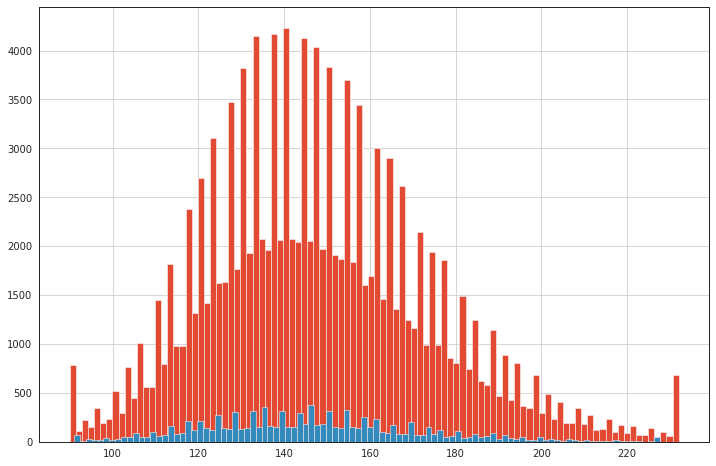

In [252]:
# df_tr['d1_hemaglobin_min	'].mean()

# df_tr['d1_creatinine_max'].isna().sum(), df_te['d1_creatinine_max'].isna().sum()

# df_tr['gcs_motor_apache'].median(), df_te['gcs_motor_apache'].median() 

# df_tr['creatinine_apache'].unique()
df_tr['d1_sysbp_max'].hist(bins=100)
df_te['d1_sysbp_max'].hist(bins=100)
# df_te['apache_2_diagnosis'].hist()

df_tr['d1_spo2_max'].describe(), df_te['d1_spo2_max'].describe() 


# df_tr['height'][df_tr['height'] == 20]

In [211]:
df_tr.head(5)

,age,bmi,elective_surgery,height,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,...,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_,gender_F,gender_M,hospital_admit_source_,hospital_admit_source_Acute Care/Floor,hospital_admit_source_Chest Pain Center,hospital_admit_source_Direct Admit,hospital_admit_source_Emergency Department,hospital_admit_source_Floor,hospital_admit_source_ICU,hospital_admit_source_ICU to SDU,hospital_admit_source_Observation,hospital_admit_source_Operating Room,hospital_admit_source_Other,hospital_admit_source_Other Hospital,hospital_admit_source_Other ICU,hospital_admit_source_PACU,hospital_admit_source_Recovery Room,hospital_admit_source_Step-Down Unit (SDU),icu_admit_source_,icu_admit_source_Accident & Emergency,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,icu_stay_type_admit,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CCU-CTICU,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU
0,4,1,0,5,28,0,2,1,4,0,0,4,4,3.0,6.0,0.0,4.0,168.0,118.0,0,40.0,36.0,134.0,39.3,0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,...,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,5,3,0,1,30,0,2,1,2,0,0,1,1,1.0,3.0,0.0,1.0,145.0,120.0,0,46.0,33.0,145.0,35.1,1,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,...,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,1,4,0,3,2,0,4,1,4,0,0,2,2,3.0,6.0,0.0,5.0,145.0,102.0,0,68.0,37.0,145.0,36.7,0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,...,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,5,1,1,2,2,0,1,2,5,1,0,2,2,4.0,6.0,0.0,5.0,185.0,114.0,1,60.0,4.0,145.0,34.8,1,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
4,1,3,0,5,12,0,3,1,4,0,0,2,2,4.0,6.0,0.0,5.0,185.0,60.0,0,103.0,16.0,145.0,36.7,0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,...,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [284]:
df_tr.columns[df_tr.isna().sum() > 0] , len(list(df_tr.columns[df_tr.isna().sum() > 0]))

(Index([], dtype='object'), 0)

In [285]:
df_te.columns[df_te.isna().sum() > 0]

Index([], dtype='object')

,age,bmi,elective_surgery,height,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,...,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_,gender_F,gender_M,hospital_admit_source_,hospital_admit_source_Acute Care/Floor,hospital_admit_source_Chest Pain Center,hospital_admit_source_Direct Admit,hospital_admit_source_Emergency Department,hospital_admit_source_Floor,hospital_admit_source_ICU,hospital_admit_source_ICU to SDU,hospital_admit_source_Observation,hospital_admit_source_Operating Room,hospital_admit_source_Other,hospital_admit_source_Other Hospital,hospital_admit_source_Other ICU,hospital_admit_source_PACU,hospital_admit_source_Recovery Room,hospital_admit_source_Step-Down Unit (SDU),icu_admit_source_,icu_admit_source_Accident & Emergency,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,icu_stay_type_admit,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CCU-CTICU,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU
130152,3,4,0,4,7,0,4,1,1,0,0,2,2,4.0,6.0,0.0,5.0,182.0,106.0,0,120.0,50.0,143.0,36.2,0,102.0,82.0,102.0,82.0,101.0,89.0,120.0,104.0,120.0,104.0,40.0,12.0,97.0,88.0,161.0,...,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
130153,5,4,0,2,5,0,3,1,2,0,0,4,3,4.0,6.0,0.0,4.0,139.0,112.0,0,125.0,42.0,140.0,36.4,0,97.0,63.0,97.0,63.0,101.0,78.0,125.0,79.0,125.0,79.0,37.0,20.0,97.0,92.0,164.0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
130154,4,4,0,4,17,0,5,1,1,0,0,4,4,1.0,1.0,0.0,1.0,346.0,104.0,1,58.0,34.0,142.0,32.9,1,82.0,60.0,82.0,60.0,101.0,58.0,110.0,83.0,110.0,83.0,34.0,12.0,100.0,77.0,156.0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
130155,5,2,0,5,20,0,3,1,2,0,0,2,2,4.0,6.0,0.0,5.0,137.0,83.0,0,60.0,31.0,142.0,35.5,0,80.0,44.0,80.0,44.0,110.0,70.0,97.0,54.0,97.0,54.0,31.0,8.0,100.0,97.0,151.0,...,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
130156,2,4,0,5,12,0,5,1,2,0,0,2,2,4.0,6.0,0.0,5.0,137.0,97.0,0,118.0,57.0,142.0,37.1,0,91.0,75.0,91.0,75.0,97.0,71.0,106.0,91.0,106.0,91.0,35.0,13.0,100.0,93.0,143.0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
